In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Importing data

In [32]:
data = pd.read_csv('Placement_Data_Full_Class.csv')
print(f'Number of Rows = {len(data)}')
data.head()

Number of Rows = 215


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [33]:
pd.DataFrame.info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


### Making the working copy of data

In [34]:
df = data.copy()

###  Checking for NULL entry

In [35]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

## Checking for duplicating of the data

In [36]:
duplicate = [x for x in df.duplicated() if x==True]
print(len(duplicate))

0


# Modifying the Dataset for our use
* Dropped the serial number column
* Hotencoding of the required variables done

In [37]:
df.drop(['sl_no'],axis=1,inplace=True)
copydata = df

In [38]:
df['workex'].replace({"Yes":1,"No":0},inplace=True)
df['status'].replace({"Placed":1,"Not Placed":0},inplace=True)

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
transformer = make_column_transformer((OneHotEncoder(),['gender','ssc_b','hsc_b','hsc_s','degree_t','specialisation']),remainder='passthrough')
df2 = pd.DataFrame(transformer.fit_transform(df),columns=transformer.get_feature_names_out())

df2.fillna(0,inplace=True)

In [39]:
df2

,onehotencoder__gender_F,onehotencoder__gender_M,onehotencoder__ssc_b_Central,onehotencoder__ssc_b_Others,onehotencoder__hsc_b_Central,onehotencoder__hsc_b_Others,onehotencoder__hsc_s_Arts,onehotencoder__hsc_s_Commerce,onehotencoder__hsc_s_Science,onehotencoder__degree_t_Comm&Mgmt,...,onehotencoder__specialisation_Mkt&Fin,onehotencoder__specialisation_Mkt&HR,remainder__ssc_p,remainder__hsc_p,remainder__degree_p,remainder__workex,remainder__etest_p,remainder__mba_p,remainder__status,remainder__salary
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,67.00,91.00,58.00,0.0,55.0,58.80,1.0,270000.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,79.33,78.33,77.48,1.0,86.5,66.28,1.0,200000.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,65.00,68.00,64.00,0.0,75.0,57.80,1.0,250000.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,56.00,52.00,52.00,0.0,66.0,59.43,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,85.80,73.60,73.30,0.0,96.8,55.50,1.0,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,80.60,82.00,77.60,0.0,91.0,74.49,1.0,400000.0
211,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,58.00,60.00,72.00,0.0,74.0,53.62,1.0,275000.0
212,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,67.00,67.00,73.00,1.0,59.0,69.72,1.0,295000.0
213,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,74.00,66.00,58.00,0.0,70.0,60.23,1.0,204000.0


# Ploting the Data for Better Visualisation

## 1. Scatter Plot

Text(0, 0.5, 'Salary')

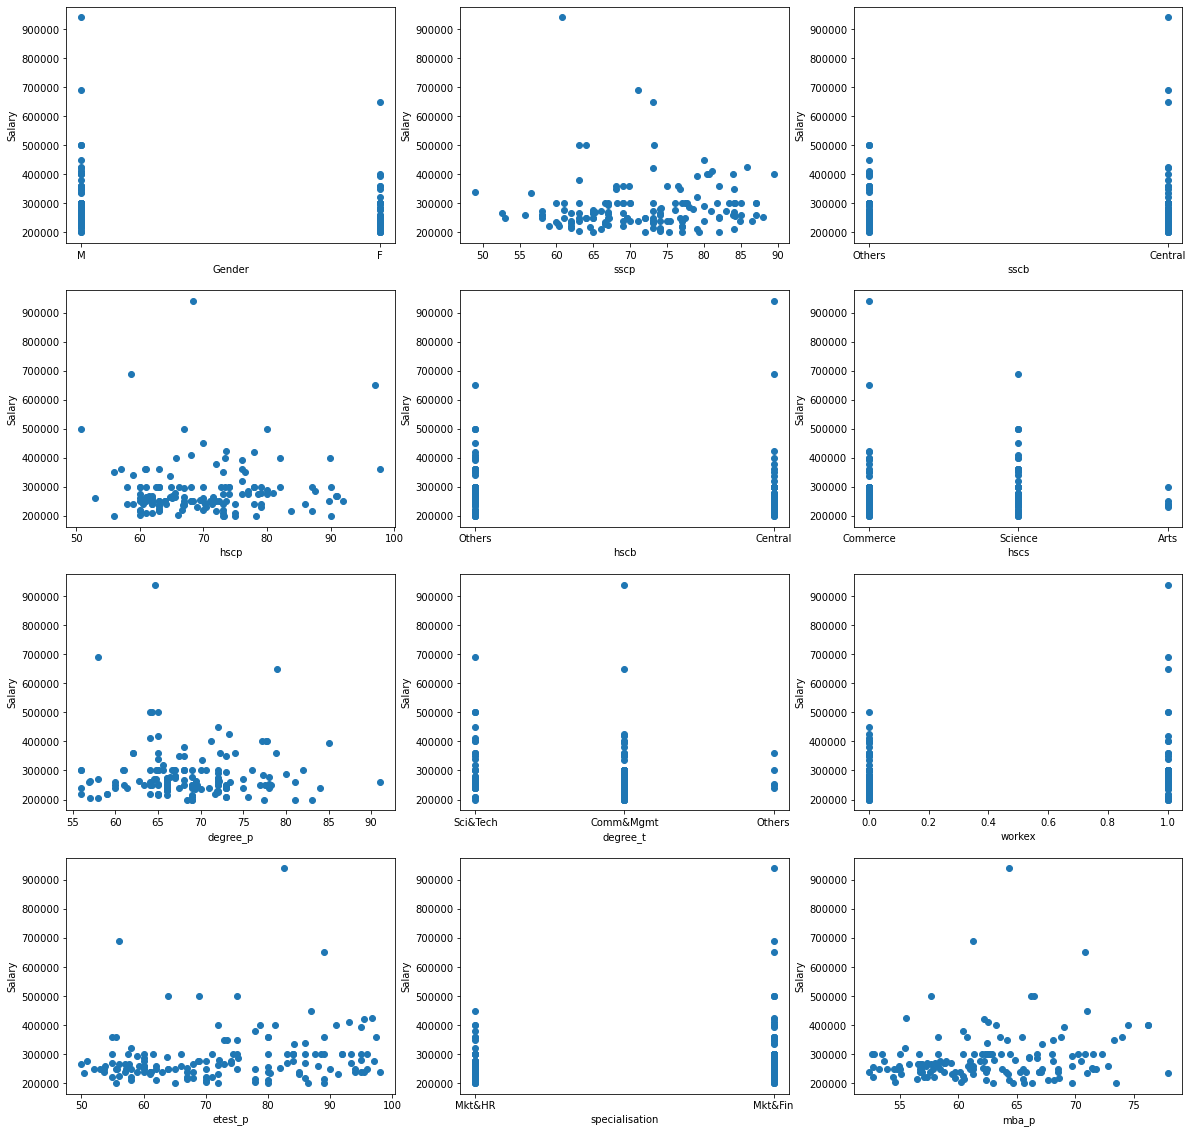

In [40]:
fig, ((a,b,c),(d,e,f),(g,h,i),(j,k,l)) = plt.subplots(4,3, figsize=(20,20))
a.scatter(df['gender'],df['salary'])
a.set_xlabel("Gender")
a.set_ylabel("Salary")
b.scatter(df['ssc_p'],df['salary'])
b.set_xlabel("sscp")
b.set_ylabel("Salary")
c.scatter(df['ssc_b'],df['salary'])
c.set_xlabel("sscb")
c.set_ylabel("Salary")
d.scatter(df['hsc_p'],df['salary'])
d.set_xlabel("hscp")
d.set_ylabel("Salary")
e.scatter(df['hsc_b'],df['salary'])
e.set_xlabel("hscb")
e.set_ylabel("Salary")
f.scatter(df['hsc_s'],df['salary'])
f.set_xlabel("hscs")
f.set_ylabel("Salary")
g.scatter(df['degree_p'],df['salary'])
g.set_xlabel("degree_p")
g.set_ylabel("Salary")
h.scatter(df['degree_t'],df['salary'])
h.set_xlabel("degree_t")
h.set_ylabel("Salary")
i.scatter(df['workex'],df['salary'])
i.set_xlabel("workex")
i.set_ylabel("Salary")
j.scatter(df['etest_p'],df['salary'])
j.set_xlabel("etest_p")
j.set_ylabel("Salary")
k.scatter(df['specialisation'],df['salary'])
k.set_xlabel("specialisation")
k.set_ylabel("Salary")
l.scatter(df['mba_p'],df['salary'])
l.set_xlabel("mba_p")
l.set_ylabel("Salary")

## 2. BoxPlot
* Helps to have a idea of spread of the data
* Helps in removing the Outliners

Text(0.5, 0, 'mba_p')

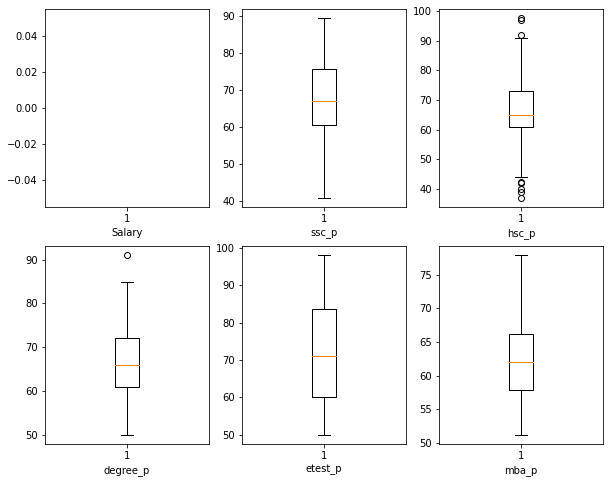

In [41]:
fig , ((a,b,c),(d,e,f)) = plt.subplots(2,3,figsize=(10,8))
a.boxplot(df['salary'])
a.set_xlabel("Salary")
b.boxplot(df['ssc_p'])
b.set_xlabel("ssc_p")
c.boxplot(df['hsc_p'])
c.set_xlabel("hsc_p")
d.boxplot(df['degree_p'])
d.set_xlabel("degree_p")
e.boxplot(df['etest_p'])
e.set_xlabel("etest_p")
f.boxplot(df['mba_p'])
f.set_xlabel("mba_p")


* Form the Above plot we can infer that the Outliners existis in 
1. Salary
2. hsc_p
3. degree_p

## Removal of the Outliners

In [42]:
# arr = ['salary','hsc_p','degree_p']
# for y in arr:
#     for x in [y]:
#         q75,q25 = np.percentile(df.loc[:,x],[75,25])
#         intr_qr = q75-q25
    
#         max = q75+(1.5*intr_qr)
#         min = q25-(1.5*intr_qr)
    
#         df.loc[df[x] < min,x] = np.nan
#         df.loc[df[x] > max,x] = np.nan

## Finding The Corelation among the Salaray and Status with Other variables

In [43]:
correlations_status=df2.corr()['remainder__status'].sort_values(ascending=False)
correlations_salary=df2.corr()['remainder__salary'].sort_values(ascending=False)
print("Status Correlations:\n",correlations_status)
print("Salary Correlations:\n",correlations_salary)

Status Correlations:
 remainder__status                        1.000000
remainder__salary                        0.865774
remainder__ssc_p                         0.607889
remainder__hsc_p                         0.491228
remainder__degree_p                      0.479861
remainder__workex                        0.276060
onehotencoder__specialisation_Mkt&Fin    0.250655
remainder__etest_p                       0.127639
onehotencoder__gender_M                  0.090670
remainder__mba_p                         0.076922
onehotencoder__degree_t_Comm&Mgmt        0.046849
onehotencoder__ssc_b_Others              0.037297
onehotencoder__hsc_s_Commerce            0.024414
onehotencoder__hsc_b_Others              0.016945
onehotencoder__degree_t_Sci&Tech         0.008688
onehotencoder__hsc_s_Science             0.007279
onehotencoder__hsc_b_Central            -0.016945
onehotencoder__ssc_b_Central            -0.037297
onehotencoder__hsc_s_Arts               -0.071653
onehotencoder__gender_F     

## Generating the different x and y sets for train and test

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
df2

,onehotencoder__gender_F,onehotencoder__gender_M,onehotencoder__ssc_b_Central,onehotencoder__ssc_b_Others,onehotencoder__hsc_b_Central,onehotencoder__hsc_b_Others,onehotencoder__hsc_s_Arts,onehotencoder__hsc_s_Commerce,onehotencoder__hsc_s_Science,onehotencoder__degree_t_Comm&Mgmt,...,onehotencoder__specialisation_Mkt&Fin,onehotencoder__specialisation_Mkt&HR,remainder__ssc_p,remainder__hsc_p,remainder__degree_p,remainder__workex,remainder__etest_p,remainder__mba_p,remainder__status,remainder__salary
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,67.00,91.00,58.00,0.0,55.0,58.80,1.0,270000.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,79.33,78.33,77.48,1.0,86.5,66.28,1.0,200000.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,65.00,68.00,64.00,0.0,75.0,57.80,1.0,250000.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,56.00,52.00,52.00,0.0,66.0,59.43,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,85.80,73.60,73.30,0.0,96.8,55.50,1.0,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,80.60,82.00,77.60,0.0,91.0,74.49,1.0,400000.0
211,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,58.00,60.00,72.00,0.0,74.0,53.62,1.0,275000.0
212,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,67.00,67.00,73.00,1.0,59.0,69.72,1.0,295000.0
213,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,74.00,66.00,58.00,0.0,70.0,60.23,1.0,204000.0


In [46]:
x_status = np.array(df2.drop(['remainder__status','remainder__salary','onehotencoder__degree_t_Comm&Mgmt','onehotencoder__ssc_b_Others','onehotencoder__hsc_s_Commerce','onehotencoder__hsc_b_Others','onehotencoder__degree_t_Sci&Tech','onehotencoder__hsc_s_Science','onehotencoder__hsc_b_Central','onehotencoder__ssc_b_Central'],axis=1))
x_salary = np.array(df2.drop(['remainder__status','remainder__salary','onehotencoder__ssc_b_Others','onehotencoder__hsc_s_Science','onehotencoder__hsc_s_Commerce','onehotencoder__hsc_b_Others','onehotencoder__hsc_b_Central','onehotencoder__degree_t_Comm&Mgmt','onehotencoder__ssc_b_Central'],axis=1))
y_status = np.array(df2['remainder__status'])
y_salary = np.array(df2['remainder__salary'])
#Splitting into train and test 
x_status_train, x_status_test, y_status_train, y_status_test = train_test_split(x_status,y_status,test_size=0.20,random_state=42)
x_salary_train, x_salary_test, y_salary_train, y_salary_test = train_test_split(x_salary,y_salary,test_size=0.20,random_state=42)

## Scalling the Data for better performance of the algorithm

In [47]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
x_status_train=scalar.fit_transform(x_status_train)
x_status_test=scalar.fit_transform(x_status_test)
x_salary_train=scalar.fit_transform(x_salary_train)
x_salary_test=scalar.fit_transform(x_salary_test)

## Performing Classification
* Performing the classification over different algorithms and finding the best model
### Algorithms We are going to use
1. Logistic Regression
2. KNN
3. SVM
4. Decision Tree

In [48]:
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

### Shapping the Data as per need

In [49]:
y_status_train=y_status_train.reshape(-1,1)
y_status_test=y_status_test.reshape(-1,1)

### Predicting on train data

Cross Validation Accuracy of xg_boost = 0.8496732026143791 with Std. Deviation = 0.08924620608477113
Cross Validation Accuracy of Logistic regression = 0.8607843137254901 with Std. Deviation = 0.06455716718884048
Cross Validation Accuracy of KNN = 0.7908496732026145 with Std. Deviation = 0.07469304380215241
Cross Validation Accuracy of SVM = 0.8320261437908497 with Std. Deviation = 0.058827160381763645


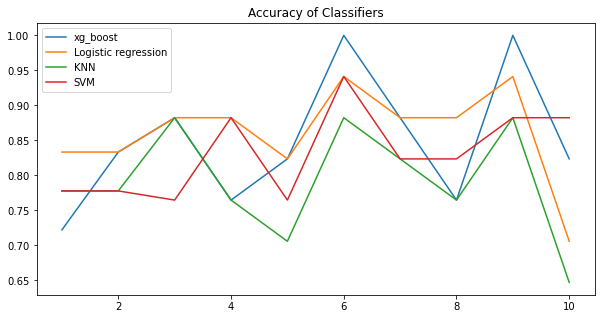

In [50]:
c0=('xg_boost',XGBClassifier(random_state=42))
c1=('Logistic regression',LogisticRegression())
c2=('KNN',KNeighborsClassifier(n_neighbors=10))
c3=('SVM',svm.SVC(random_state=42))
classifiers = [c0,c1,c2,c3]

from sklearn.model_selection import cross_val_score

plt.figure(figsize=(10,5))
for c in classifiers:
    scores = cross_val_score(c[1],x_status_train,y_status_train, scoring="accuracy",cv=10)
    print(f"Cross Validation Accuracy of {c[0]} = {scores.mean()} with Std. Deviation = {scores.std()}")
    plt.plot(range(1,11),scores,label=c[0])
    
plt.title("Accuracy of Classifiers")
plt.legend()
plt.show()

# Regression
* Here we will use linear regression

In [51]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
model = RandomForestClassifier().fit(x_salary_train,y_salary_train)

### * Low score of the model because 0 salary of unplaced students was not removed & Not removing OutLiners

In [52]:
model.score(x_salary_train,y_salary_train)

1.0

In [53]:
scores = cross_val_score(LinearRegression(),x_salary_train,y_salary_train, scoring="neg_mean_squared_error",cv=10)
print(f"Cross Validation RMS Error of  = {np.sqrt(-scores).mean()} with Std. Deviation = {np.sqrt(-scores).std()}")

Cross Validation RMS Error of  = 121479.22571835392 with Std. Deviation = 35127.28674099835


# HyperParameter Tunning

In [54]:
from sklearn.model_selection import GridSearchCV

log_param={'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear']}
model_status1=LogisticRegression()
model_status1_cv=GridSearchCV(model_status1,log_param,scoring='accuracy',cv=10)
model_status1_cv.fit(x_status_train,y_status_train)
print("Logistic Regression Classifier")
print("Tuned Hyperparameters :",model_status1_cv.best_params_)
print("Accuracy :",model_status1_cv.best_score_)

svm_param = {'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']}
model_status0=svm.SVC(random_state=41)
model_status0_cv=GridSearchCV(model_status0,svm_param,scoring='accuracy',cv=10)
model_status0_cv.fit(x_status_train,y_status_train)
print("SVM Classifier")
print("Tuned Hyperparameters :",model_status0_cv.best_params_)
print("Accuracy :",model_status0_cv.best_score_)  

Logistic Regression Classifier
Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.8843137254901962
SVM Classifier
Tuned Hyperparameters : {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy : 0.8725490196078433
